# Project name
Talk about project goals and this section is for also cleaning/sorting data

In [69]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import sklearn
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import warnings

In [70]:
data = pd.read_csv('data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [71]:
#checking the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [72]:
#changing basement to int to prevent future issues
data['sqft_basement'] = data['sqft_basement'].astype(str)
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'], errors='coerce')

In [73]:
#changing missing values for waterfront and sqft basement properties to zero
data['waterfront'] = data['waterfront'].fillna(0.0)
data['sqft_basement'] = data['sqft_basement'].fillna(0.0)

In [74]:
#dropping columns that I won't be using
data.drop('lat', axis='columns', inplace=True)
data.drop('long', axis='columns', inplace=True)
data.drop('date', axis='columns', inplace=True)
data.drop('view', axis='columns', inplace=True)
data.drop('sqft_lot15', axis='columns', inplace=True)
data.drop('sqft_living15', axis='columns', inplace=True)
data.drop('zipcode', axis='columns', inplace=True)
data.drop('yr_renovated', axis='columns', inplace=True)
data.drop('sqft_above', axis='columns', inplace=True)
data.drop('id', axis='columns', inplace=True)

In [75]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987


# Correlations

In [76]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,285.716581,1970.999676
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,439.819830,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,0.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,0.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,0.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,550.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,4820.000000,2015.000000


In [77]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056,0.667951,0.321108,0.053953
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.297229,0.155670
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.278485,0.507173
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.428660,0.318152
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.015031,0.052946
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,-0.241866,0.489193
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,0.083050,-0.024487
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,0.168482,-0.361592
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.165843,0.447865
sqft_basement,0.321108,0.297229,0.278485,0.428660,0.015031,-0.241866,0.083050,0.168482,0.165843,1.000000,-0.130085


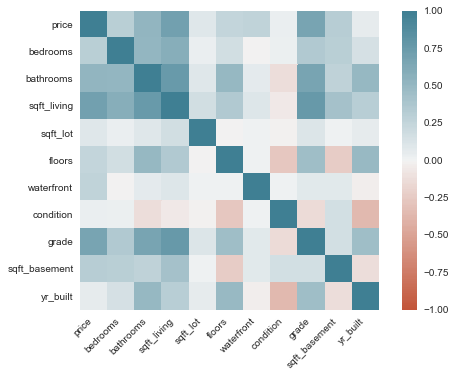

In [78]:
#using heatmap to show these correlations and checking multilinearity
import seaborn as sns
corr = data.corr()
axes = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right');

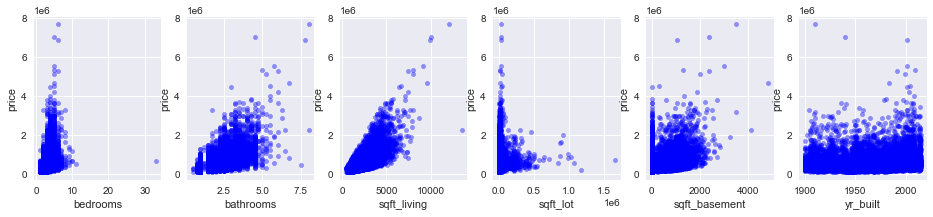

In [79]:
#doing graphs for all columns against price that are continuous;
#checking for linearity
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built', 'floors'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

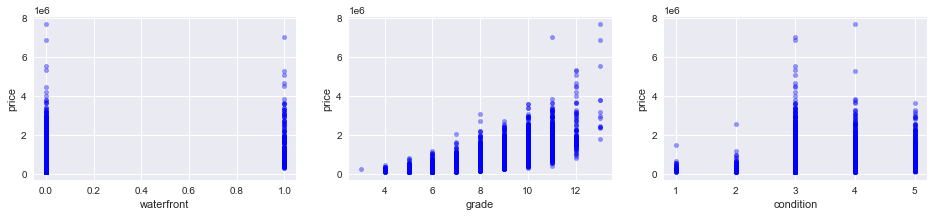

In [80]:
#doing graphs for all columns against price that are categorical;
#checking for linearity
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['waterfront', 'grade', 'condition'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

# Models
First will be the base model followed by tweaked models depending on outcomes

In [81]:
#getting both statsmodel and scikit learn done with one function
#def model(x_train, x_test, y_train, y_test):
    # statsmodels
   # features = x_train.copy()
    #features['price'] = y_train
    
    #formula = 'price~' + '+'.join(x_train.columns)
    #model = ols(formula=formula, data=features).fit()
    
    #sklearn
    #linreg = LinearRegression()
    #linreg.fit(x_train, y_train)
    
    #y_hat_train = linreg.predict(x_train)
    #y_hat_test = linreg.predict(x_test)
    
    #train_mse = mean_squared_error(y_train, y_hat_train)
    #test_mse = mean_squared_error(y_test, y_hat_test)
    
    #print("Train R2: ", linreg.score(x_train, y_train))
    #print("Test R2: ", linreg.score(x_test, y_test))
    
    #print("Train RMSE: ", train_mse**0.5)
    #print("Test RMSE: ", test_mse**0.5)
    
    #return model.summary()

In [82]:
#Doing the statsmodel and sklearn seperately to see how coding going later on
y = data[['price']]
x = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built', 'waterfront', 'grade', 'condition']]

In [83]:
#statsmodel
formula = 'price ~ bedrooms+bathrooms+sqft_living+sqft_lot+sqft_basement+yr_built+waterfront+grade+condition'
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     4359.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:53:58   Log-Likelihood:            -2.9621e+05
No. Observations:               21597   AIC:                         5.924e+05
Df Residuals:                   21587   BIC:                         5.925e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.504e+06    1.3e+05     49.885      0.000    6.25e+06    6.76e+06
bedrooms      -4.302e+04   2051.191    -20.972      0.000    -4.7e+04    -3.9e+04
bathrooms      5.548e+04   3364.975     16.488      0.000    4.89e+04    6.21e+04
sqft_living     173.8068      3.525     49.300      0.000     166.897     180.717
sqft_lot         -0.2530      0.037     -6.868      0.000      -0.325      -0.181
sqft_basement     5.8438      4.069      1.436      0.151      -2.132      13.820
yr_built      -3741.7766     66.752    -56.055      0.000   -3872.615   -3610.939
waterfront     7.545e+05   1.84e+04     41.039      0.000    7.18e+05    7.91e+05
grade          1.329e+05   2166.534     61.348      0.000    1.29e+05    1.37e+05
condition      1.659e+04   2482.824      6.681      0.000    1.17e+04    2.15e+04
==============================================================================
Omnibus:                    15763.050   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           990752.298
Skew:                           2.915   Prob(JB):                         0.00
Kurtosis:                      35.665   Cond. No.                     3.86e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Basement category seems to be the only one so far with a high p value but let's see what we can to do to change that as well as perhaps get a better R squared.

In [84]:
#sklearn
linreg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(x_train, y_train))
print("Test R2: ", linreg.score(x_test, y_test))
    
print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.6449715045594336
Test R2:  0.6450725980005936
Train RMSE:  218025.52888402643
Test RMSE:  222256.9437678374


Both test and train data for r squared and RMSE seem relatively close, but again, let's see what we can do to get better results.

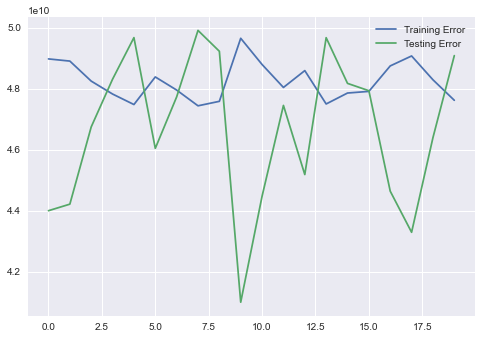

In [85]:
#cross validation of model before transformations
linreg = LinearRegression()

num = 20 
train_err = []
test_err = []
for i in range(num):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    linreg.fit(x_train, y_train)
    y_hat_train = linreg.predict(x_train)
    
    y_hat_test = linreg.predict(x_test)
    
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
    
plt.plot(list(range(num)), train_err, label='Training Error')
plt.plot(list(range(num)), test_err, label='Testing Error')
plt.legend();

Talk about the fit of the model here; seems overfitted 

# Beginning of Transformations
First is logging (perhaps all variables instead of just price?)
Second will be min-max scale
Third will be checking interactions (potentially merging them or getting rid of one of them)
Fourth will be to remove any outliers (looking at you bedrooms!)

In [86]:
#use log data here and then rerun model to double check it
#using log on price to see how it changes everything; is it a better change than doing the x values?
data['loggedprice'] = np.log(data['price'])
formula = 'loggedprice ~ bedrooms+bathrooms+sqft_living+sqft_lot+sqft_basement+yr_built+waterfront+grade+condition'
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loggedprice   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     4205.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:53:59   Log-Likelihood:                -5856.6
No. Observations:               21597   AIC:                         1.173e+04
Df Residuals:                   21587   BIC:                         1.181e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        21.1656      0.189    111.953      0.000      20.795      21.536
bedrooms         -0.0284      0.003     -9.536      0.000      -0.034      -0.023
bathrooms         0.1067      0.005     21.861      0.000       0.097       0.116
sqft_living       0.0002   5.11e-06     31.090      0.000       0.000       0.000
sqft_lot      -9.678e-08   5.34e-08     -1.812      0.070   -2.01e-07    7.92e-09
sqft_basement  2.944e-05    5.9e-06      4.989      0.000    1.79e-05     4.1e-05
yr_built         -0.0054   9.68e-05    -55.291      0.000      -0.006      -0.005
waterfront        0.4972      0.027     18.651      0.000       0.445       0.549
grade             0.2409      0.003     76.670      0.000       0.235       0.247
condition         0.0338      0.004      9.396      0.000       0.027       0.041
==============================================================================
Omnibus:                      102.558   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.540
Skew:                          -0.123   Prob(JB):                     8.14e-26
Kurtosis:                       3.260   Cond. No.                     3.86e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
#sklearn
linreg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(x_train, y_train))
print("Test R2: ", linreg.score(x_test, y_test))
    
print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.6423014066864519
Test R2:  0.6558398410797799
Train RMSE:  220009.63474072944
Test RMSE:  214333.12450883878


In [88]:
#this where you transform loggedprice back or keep it for now since doing more test?

In [89]:
#This the place to put dummies?
#treating waterfront, grade and condition as categorical and getting dummies for them
#wtft_dummies = pd.get_dummies(data['waterfront'], prefix='wtft', drop_first=True)
#grade_dummies = pd.get_dummies(data['grade'], prefix='grde', drop_first=True)
#condition_dummies = pd.get_dummies(data['condition'], prefix='flr', drop_first=True)
#data = pd.concat([data, wtft_dummies, grade_dummies, condition_dummies], axis=1)
#data.head()

In [90]:
#train test split AFTER get dummies
#formula = 'loggedprice ~ bedrooms+bathrooms+sqft_living+sqft_lot+sqft_basement+yr_built+wtft_dummies+grade_dummies+condition_dummies'
#model = ols(formula=formula, data=data).fit()
#model.summary()

r squared went up but p values also went up; see what more we can do to get a better model; taking dummy variables out since going to be logging everything else later

In [92]:
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

#for xcol, ax in zip(['wtft_dummies', 'grade_dummies', 'condition_dummies'], axes):
    #data.plot(kind='scatter', x=xcol, y='loggedprice', ax=ax, alpha=0.4, color='b')

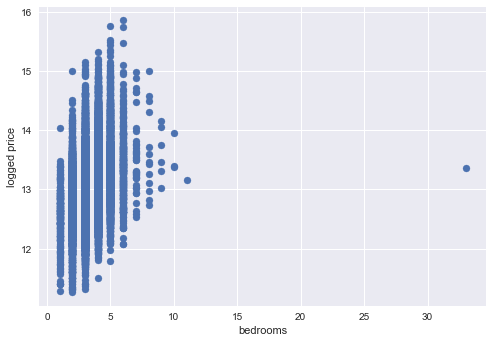

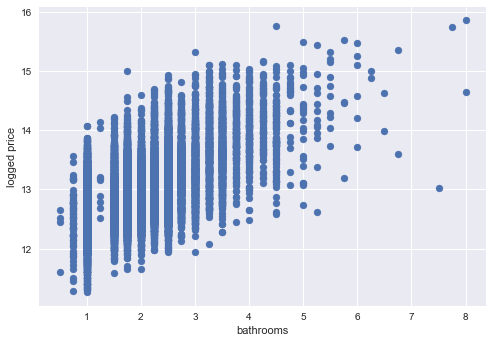

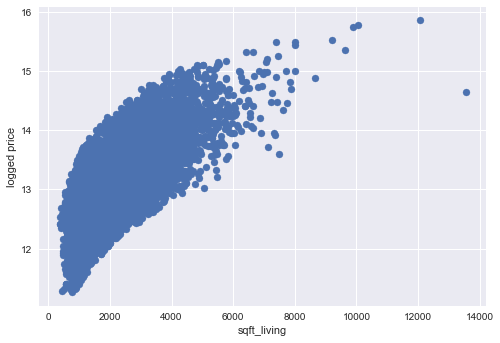

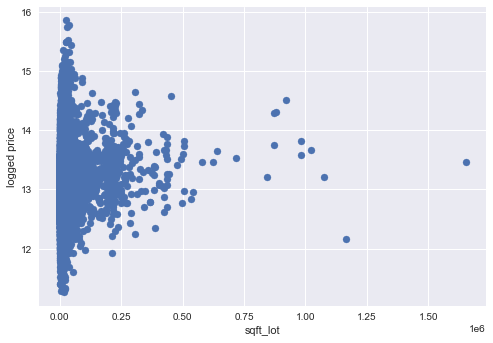

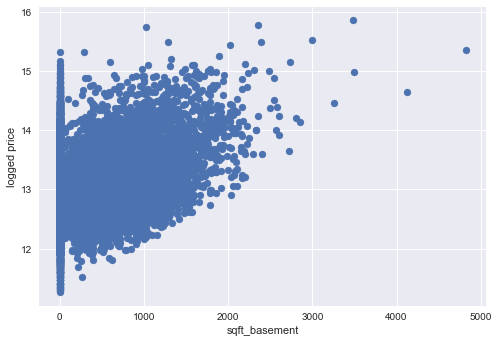

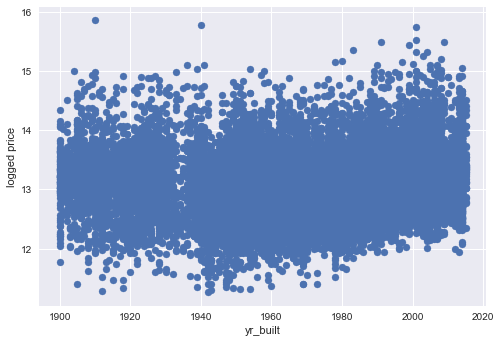

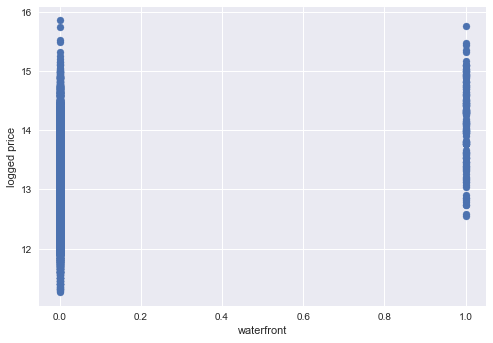

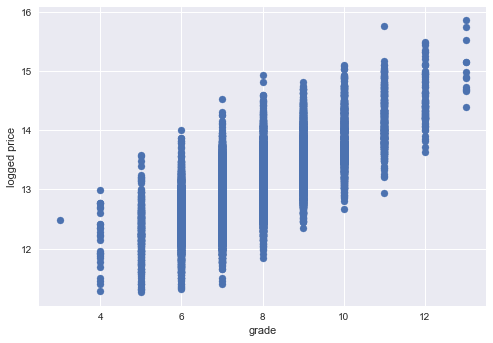

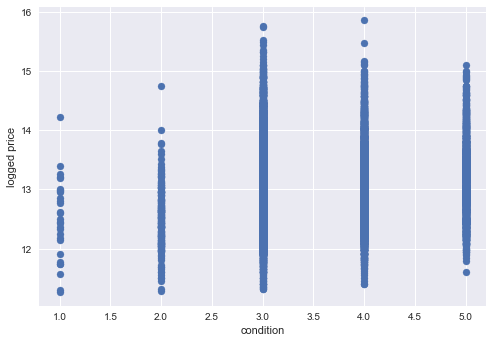

In [93]:
for col in x.columns:
    fig = plt.figure
    ax = plt.gca()
    ax.scatter(x[col], np.log(y))
    
    ax.set_xlabel(col)
    ax.set_ylabel('logged price')
    
    plt.show()

<ipython-input-94-65b65ef9f854>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


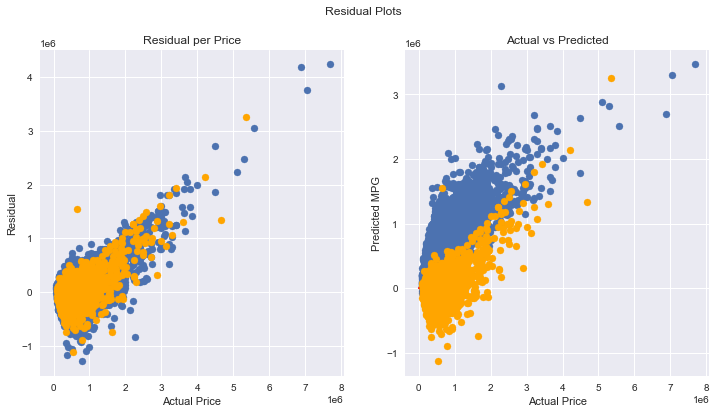

In [94]:
#check homoscedasticity (QQ plot); want equal variance throughout
#add a legend to each plot
#figure out why hlines arent showing up
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Residual Plots')

axes[0].scatter(y_train, y_train-y_hat_train)
axes[0].scatter(y_test, y_test-y_hat_test, color='orange')
axes[0].set(xlabel='Actual Price', ylabel='Residual', title='Residual per Price')
axes[0].hlines(0, xmin=0, xmax=50, colors='red')

axes[1].scatter(y_train, y_hat_train)
axes[1].scatter(y_test, y_test-y_hat_test, color='orange')
axes[1].plot([-1, 10], [-1, 10], color='red', linestyle='-')
axes[1].set(xlabel='Actual Price', ylabel='Predicted MPG', title='Actual vs Predicted')
fig.show()

explain how the model above show that the data is off; actual price is lower than what is predicted to changes to the model should be done

In [95]:
#check for normality of residuals (histograms); homo and normal are checked after model while
#linearity and multilinearity are before model

# Min Max Scaling

In [96]:
#use min max scaler then use model again; check results
#already have logged price and leave out waterfront, condition and grade since already on a minimal scale?
#commented out this section since getting "NoneType Error: not subscriptable"

data['logbeds'] = np.log(data['bedrooms'])
data['logbaths'] = np.log(data['bathrooms'])
data['logliving'] = np.log(data['sqft_living'])
data['loglot'] = np.log(data['sqft_lot'])
data['logfloors'] = np.log(data['floors'])
data['logbase'] = np.log(data['sqft_basement'])
data['logyear'] = np.log(data['yr_built'])

scaled_beds = (data['logbeds']-np.mean(data['logbeds']))/np.sqrt(np.var(data['logbeds']))
scaled_baths = (data['logbaths']-np.mean(data['logbaths']))/np.sqrt(np.var(data['logbaths']))
scaled_living = (data['logliving']-np.mean(data['logliving']))/np.sqrt(np.var(data['logliving']))
scaled_lot = (data['loglot']-np.mean(data['loglot']))/np.sqrt(np.var(data['loglot']))
scaled_floors = (data['logfloors']-np.mean(data['logfloors']))/np.sqrt(np.var(data['logfloors']))
scaled_base = (data['logbase']-np.mean(data['logbase']))/np.sqrt(np.var(data['logbase']))
scaled_year = (data['logyear']-np.mean(data['logyear']))/np.sqrt(np.var(data['logyear']))

data_fin = pd.DataFrame([])
data_fin['bedrooms'] = scaled_beds
data_fin['bathrooms'] = scaled_baths
data_fin['living'] = scaled_living
data_fin['lot'] = scaled_lot
data_fin['floors'] = scaled_floors
data_fin['basement'] = scaled_base
data_fin['yr_built'] = scaled_year

price = data['price']
data_fin = pd.concat((price, data_fin, data['waterfront'], data['condition'], data['grade']), axis=1)
y = data_fin['price']
x = data_fin.drop(['price'], axis=1)

C:\Users\chron\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
#test the model again
#wait to do ols since can't figure out formula
#formula = data_fin['price'] ~ x'
#model = ols(formula=formula, data=data).fit()
#model.summary()

In [97]:
#testing with sklearn
#linreg = LinearRegression()
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
#linreg.fit(x_train, y_train)

#y_hat_train = linreg.predict(x_train)
#y_hat_test = linreg.predict(x_test)


#train_mse = mean_squared_error(y_train, y_hat_train)
#test_mse = mean_squared_error(y_test, y_hat_test)

#print("Train R2: ", linreg.score(x_train, y_train))
#print("Test R2: ", linreg.score(x_test, y_test))
    
#print("Train RMSE: ", train_mse**0.5)
#print("Test RMSE: ", test_mse**0.5)

In [98]:
#figure out how to test after min max scaling

# Interactions

In [99]:
#Checking for interactions


# Outliers

In [100]:
#Checking for Outliers using IQR
Q1 = np.percentile(data['bedrooms'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['bedrooms'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

1.0

In [103]:
print("Old Shape: ", data.shape)
#upper bound
upper = np.where(data['bedrooms'] >= (Q3+1.5*IQR))
#lower bound
lower = np.where(data['bedrooms'] <= (Q1-1.5*IQR))

#removing the outliers
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)

print("New Shape: ", data.shape)

Old Shape:  (21067, 19)
New Shape:  (21067, 19)


In [106]:
#cross validation of model after transformations
#linreg = LinearRegression()

#num = 20 
#train_err = []
#test_err = []
#for i in range(num):
    #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    #linreg.fit(x_train, y_train)
    #y_hat_train = linreg.predict(x_train)
    
    #y_hat_test = linreg.predict(x_test)
    
    #train_err.append(mean_squared_error(y_train, y_hat_train))
    #test_err.append(mean_squared_error(y_test, y_hat_test))
    
#plt.plot(list(range(num)), train_err, label='Training Error')
#plt.plot(list(range(num)), test_err, label='Testing Error')
#plt.legend();

In [ ]:
##Insert final QQ plots after all changes in addition to histograms after running model one last time

In [ ]:
#Conclusions